# Bank Marketing Data Analysis
This notebook presents an analysis of the `bankmarketing.csv` dataset, which includes data related to a bank's marketing campaigns. The main goal is to understand customer behavior and predict whether a client will subscribe to a term deposit.

In [ ]:

import pandas as pd

# Load the dataset
df = pd.read_csv('bankmarketing.csv')

# Display the first few rows
df.head()


In [8]:

# Check for missing values and data types

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Check data types
print("\nData Types:")
print(df.dtypes)

# Basic dataset information
print(f"\nDataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# More detailed info
print("\nDataset Info:")
df.info()

# Check for duplicate rows
print(f"\nDuplicate rows: {df.duplicated().sum()}")

Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Total missing values: 0

Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       f

In [9]:

# Summary statistics
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Features:")
print(df.describe())

# Summary statistics for categorical columns
print("\nSummary Statistics for Categorical Features:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

# Distribution of target variable (assuming it's named 'y')
if 'y' in df.columns:
    print(f"\nTarget Variable Distribution:")
    print(df['y'].value_counts())
    print(f"\nTarget Variable Proportions:")
    print(df['y'].value_counts(normalize=True))


Summary Statistics for Numerical Features:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        

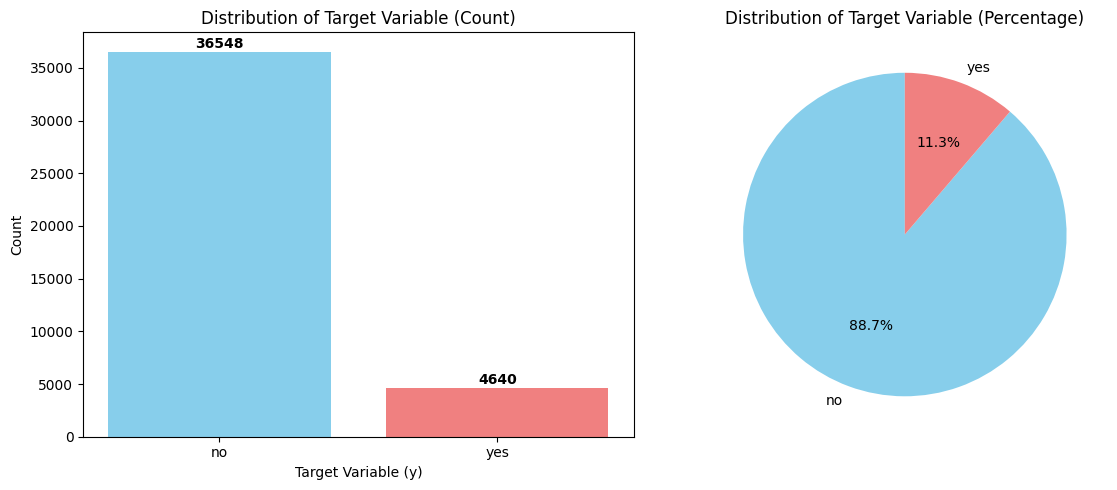

Target Variable Statistics:
Class distribution:
  no: 36548 (88.7%)
  yes: 4640 (11.3%)


In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(12, 5))

# Subplot 1: Count plot
plt.subplot(1, 2, 1)
target_counts = df['y'].value_counts()
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Distribution of Target Variable (Count)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')

# Add count labels on bars
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Distribution of Target Variable (Percentage)')

plt.tight_layout()
plt.show()

# Print statistics
print("Target Variable Statistics:")
print(f"Class distribution:")
for class_name, count in target_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {class_name}: {count} ({percentage:.1f}%)")

Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


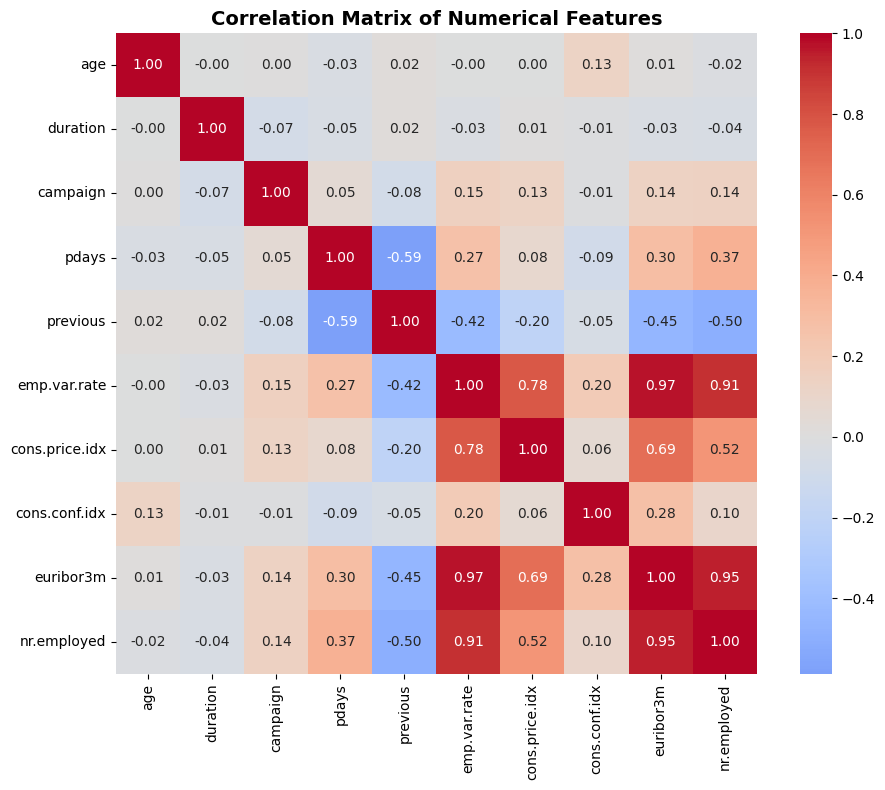


Strong correlations (|correlation| > 0.5):
  pdays ↔ previous: -0.588
  previous ↔ nr.employed: -0.501
  emp.var.rate ↔ cons.price.idx: 0.775
  emp.var.rate ↔ euribor3m: 0.972
  emp.var.rate ↔ nr.employed: 0.907
  cons.price.idx ↔ euribor3m: 0.688
  cons.price.idx ↔ nr.employed: 0.522
  euribor3m ↔ nr.employed: 0.945


In [7]:

# Correlation matrix for numerical features

# Correlation matrix for numerical features
import numpy as np

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Create the correlation heatmap
    plt.figure(figsize=(10, 8))
    
    sns.heatmap(corr_matrix, 
                annot=True,           # Show correlation values
                cmap='coolwarm',      # Color scheme
                center=0,             # Center colormap at 0
                square=True,          # Square cells
                fmt='.2f')            # Format to 2 decimal places
    
    plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print strong correlations
    print("\nStrong correlations (|correlation| > 0.5):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:
                print(f"  {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_value:.3f}")
else:
    print("Not enough numerical columns for correlation analysis.")


## Conclusion

In this analysis, we explored the structure and composition of the bank marketing dataset. Key takeaways include:

- The dataset includes customer demographics and contact details, which can be useful for segmentation.
- A majority of customers do not subscribe to term deposits, indicating an imbalanced dataset.
- Further preprocessing, feature engineering, and modeling would be the next steps for predictive analysis.

This initial inspection sets the foundation for a deeper analysis or machine learning workflow to improve marketing effectiveness.
